In [14]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

##### Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Read Data

In [16]:
df = pd.read_csv('flat-ui__data-Fri Dec 27 2024.csv')
df = df[['Year', 'Mean']]
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.head()

,Year,Mean
0,1850-01-01,-0.4177
1,1851-01-01,-0.2333
2,1852-01-01,-0.2294
3,1853-01-01,-0.2704
4,1854-01-01,-0.2915


##### Model

In [17]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01, random_state=42) 
    #the model will identify the top 1% of data points with the highest anomaly scores as outliers
    #Setting it too high can lead to misclassification of normal data points as outliers 
    #Setting it too low can result in many actual outliers going undetected
    #play around with 0.05 (top 5%), or 0.1 (top 1%)
model.fit(df[['Mean']])

IsolationForest(contamination=0.01, random_state=42)

##### Predict

In [19]:
# Predict anomalies (1 for inliers, -1 for outliers)
df['anomaly_score'] = model.decision_function(df[['Mean']])
df['anomaly'] = model.predict(df[['Mean']])
df.head() #-1 are the anomalies

,Year,Mean,anomaly_score,anomaly
0,1850-01-01,-0.4177,0.202590,1
1,1851-01-01,-0.2333,0.270538,1
2,1852-01-01,-0.2294,0.269953,1
3,1853-01-01,-0.2704,0.269225,1
4,1854-01-01,-0.2915,0.254958,1


##### Visualize

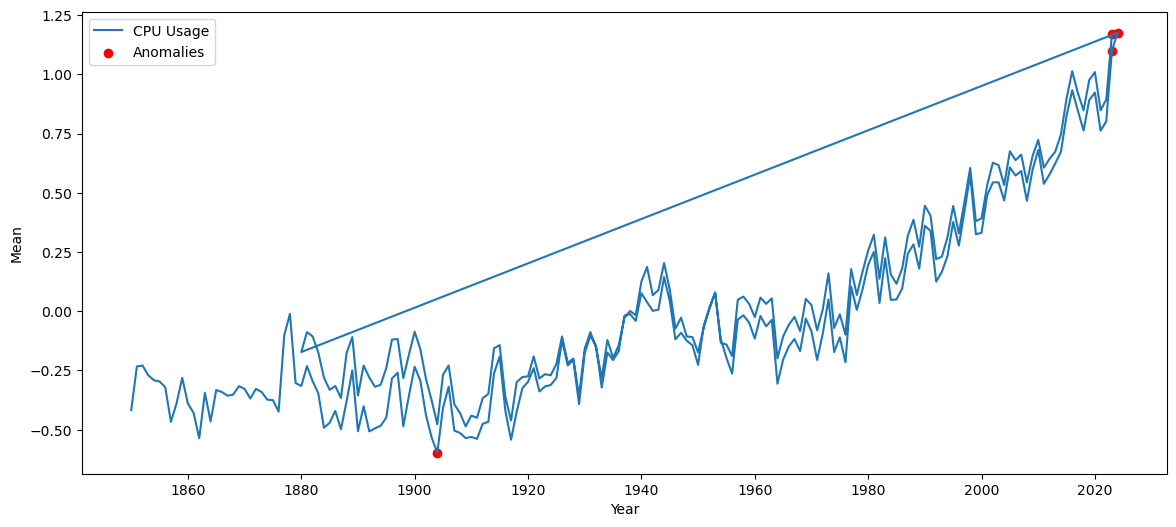

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(df['Year'], df['Mean'], label='CPU Usage')
plt.scatter(df[df['anomaly'] == -1]['Year'], df[df['anomaly'] == -1]['Mean'], color='red', label='Anomalies')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.legend()
plt.show()